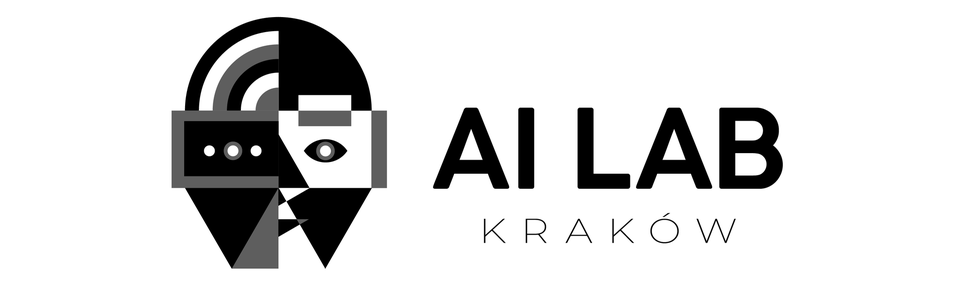

# AI Lab Recruitment Tasks
Dear Candidate,

We are pleased to inform you that you are about to begin the recruitment test for membership at AI Lab. Please ensure that you have a quiet space and all necessary materials before starting.

The test will assess your skills and suitability for the position, and it is expected to take approximately one week to complete. We encourage you to read the instructions carefully before proceeding.

To submit your solutions, you must fork the [AI_Lab_Recruitment_Tasks_2024](https://github.com/AI-LAB-AGH/AI_Lab_Recruitment_Tasks_2024) repository. Remember to make it private and add AI Lab members as collaborators: <a href="https://github.com/bjam24">bjam24</a> and <a href="https://github.com/BartekKruczek">BartekKruczek</a>.

Further information about this test may be available in the repository's README file.

If you encounter any issues during the test or have any additional questions, feel free to contact us at ailab@agh.edu.pl.

By participating in this recruitment, you agree to uphold the integrity of the process. In case of any dishonesty or attempts to cheat (e.g using ChatGPT, copying work), your candidacy will be **disqualified**, and your application will no longer be processed.

We wish you the best of luck and thank you for your interest in joining our team!

Best regards,

AI Lab Recruitment Team

## Task 1 - Classification

Using the  [Real / Fake Job Posting Prediction](https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction)  dataset, create a machine learning model that classifies job postings as either real or fake. Your model should utilize both the text of the job descriptions and additional metadata features to achieve accurate predictions. You are encouraged to take any necessary steps in this task to obtain the best possible results. The more thorough and effective your approach, the more your effort will be appreciated.

In [ ]:
# comments are appreciated

## Task 2 - NLP

### Beginner

The dataset CENSUS-NER-Name-Email-Address-Phone is available at [Hugging Face](https://huggingface.co/datasets/Josephgflowers/CENSUS-NER-Name-Email-Address-Phone). Write a single regular expression that will find email addresses in various formats in the 'user' column, for example:
- user@domain.com
- user@domain.co.uk
- user123@domain.com
- user+tag@domain.com

Count the occurrences of domain names. Present the results in a bar chart. Solutions other than exclusively one regular expression will not be considered.

In [ ]:
import pandas as pd

# Load dataframe
df = pd.read_csv("hf://datasets/Josephgflowers/CENSUS-NER-Name-Email-Address-Phone/FMCSA_CENSUS1_2016Sep_formatted_output.csv")

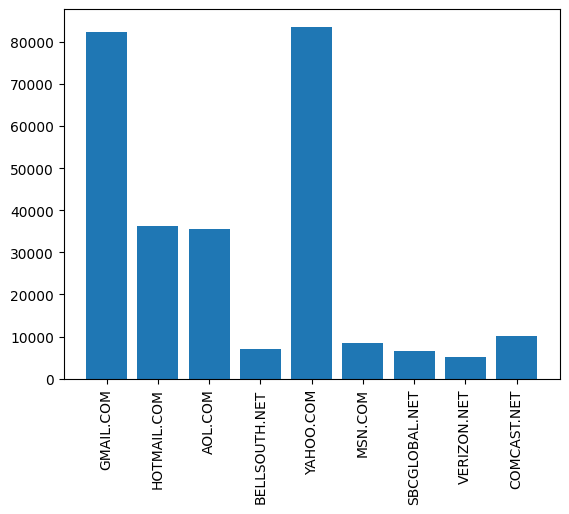

In [ ]:
import re
import matplotlib.pyplot as plt

# Create regex pattern and dict to count distinct domains
pattern = re.compile("[-a-zA-Z0-9]+@[-a-zA-Z0-9]+.[a-zA-Z]+")
domain_count = {}

# Iterate through the dataframe
for i in range(len(df)):
  email = pattern.search(df["user"][i])

  # Count current comain
  if email and email.group().split("@")[1] not in domain_count:
    domain_count[email.group().split("@")[1]] = 1
  elif email and email.group().split("@")[1] in domain_count:
    domain_count[email.group().split("@")[1]] += 1

keys = list(domain_count.keys())[:]

# Remove domains that appeared 5000 times or less to make the bar chart more readable
for key in keys:
  if domain_count[key] < 5000:
    del domain_count[key]

# Plot the results
plt.xticks(rotation=90)
plt.bar(domain_count.keys(), domain_count.values())
plt.show()

### Intermediate

Please take one pre-trained NLP model form HuggingFace (size of it is up to you). Your task is to make a promp with question about our University. Nest, pass 3-5 pages of English version of AGH students regulation and ask these questions again. Point is to detect anomalies (within answers) and see how model itself behave with long term memory. No fine-tuning required.

In [23]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("question-answering", model="distilbert/distilbert-base-uncased-distilled-squad")

In [24]:
# A few pages of AGH students regulation in English
context = """The AGH University of Krakow Study Regulations, hereinafter referred to as the Study Regulations, shall
specify in particular the organization of the studies and the related rights and duties of students, and shall
apply to all fields of study, levels of study, profiles and forms of study conducted at the University.
2. The Study Regulations shall apply to all students, University employees, in particular academic teachers, and
other persons conducting classes with students.
3. The terms used in the Study Regulations shall have the following meanings:
1) characteristics of learning outcomes – learning outcomes specified in the form of characteristics for
levels 6 and 7 of the second degree typical of qualifications obtained under the higher education system
as defined in the Act of 22th of December 2015 on the Integrated Qualifications System, hereinafter
referred to as the IQS Act, and in the executive regulations;
2) Dean of the Faculty – the head of the basic organisational unit of the University that conducts
education in a given field of study, level and profile;
3) learning outcomes – the amount of knowledge, skills and social competence obtained in the process
of education by the student;
4) form of study – full-time or part-time studies;
5) class schedule – a detailed schedule of modules in a given semester of studies along with information
about the place and time of classes;
6) congress languages – English, German, French, Spanish, Russian language;
7) engineer field of study – a field of study leading to a degree of inżynier or magister inżynier;
8) field of study – a separate form of education within higher education, carried out at the University in
the manner specified in the curriculum within the 6th and 7th level of the Polish Qualifications Framework;
9) learning outcomes prescribed to a field of study – learning outcomes defined for a given field of
study, level and profile;
10) module – a separate unit of the realization of the curriculum and documentation of the course of study,
required within a given semester of studies or as a one of graduation conditions, to which, in particular,
the assumed learning outcomes, program content and a number of ECTS credits are assigned; a module
may be in particular a course, practical placement, diploma project or diploma thesis, as well as work in
a student research club and participation in scientific research;
11) learning outcomes prescribed to a module – learning outcomes defined for each module;
11a) thesis supervisor – the diploma thesis supervisor or the diploma project supervisor;
12) study plan – a set of all modules in each semester along with the assigned ECTS credits, forms of
classes and number of hours, as well as a number of ECTS credits required to complete a given semester;
13) Polish Qualifications Framework [PRK/PQF] – a description of eight separate levels of qualifications
corresponding to the relevant levels of the European Qualifications Framework, as referred to in the IQS
Act, formulated with the use of general characteristics of learning outcomes for qualifications at
particular levels, classified in terms of knowledge, skills and social competences;
14) PRK level 6 – the level of the Polish Qualifications Framework corresponding to the level of first-cycle
degree programme;
15) PRK level 7 – the level of the Polish Qualifications Framework corresponding to the level of secondcycle degree programme;
16) level of studies – a first-cycle degree programme or second-cycle degree programme;
17) profile – a practical or general academic profile within a given field of study;
18) general academic profile – a profile of studies where more than half of the ECTS credits required for
graduation is allocated to classes related to the scientific activity conducted at the University in the
discipline or disciplines to which the field of study is assigned to, and where the participation of students
in classes preparing for scientific and research activity or participation in this activity is included;
19) practical profile – a profile of studies where more than half of the ECTS credits required for graduation
is allocated to classes developing practical skills;
20) curriculum – a description of the assumed learning outcomes applicable for a given field of study, level
and profile, along with a description of the process leading to their achievement;
21) teacher responsible for the course – an academic teacher or other person with competences and
experience enabling proper conduct of classes, to whom the Dean of the Faculty entrusted conducting
a course provided in the curriculum;
22) class teacher – an academic teacher or other person with competences and experience enabling proper
conduct of classes, or a doctoral student undergoing practical placement in the form of conducting
classes, to whom the Dean of the Faculty entrusted conducting classes within a given course, in
accordance with the plan of teaching hours;
23) course – the smallest separate unit in the curriculum conducted at the University, consisting of at least
one form of classes, to which the assumed learning outcomes and number of ECTS credits are assigned
to, carried out by an academic teacher employed at the University or another person having competence
and experience enabling proper conduct of classes;
24) ECTS credits – a number of credits defined in the European Credit Transfer System as a measure of
the student’s average workload necessary to achieve the assumed learning outcomes;
25) year of education – a year of students beginning their studies in the first semester of studies in a
given academic year, in accordance with the curriculum applicable for a given field of study, level and
profile;
26) curriculum differences – modules that a student shall be required to complete additionally due to
transfer from another university, change of the field of study or form of study, as well as due to semester
repetition, leave form classes or resumption of studies;
27) major – a way of diversifying the organization of education within a field of study conducted at the level
of the second-cycle degree programmes;
28) the Statute – the Statute of the AGH University of Krakow;
29) student – a person taking higher education, admitted to studies in accordance with the regulations in
force at the University;
30) studies – a form of higher education, conducted at the level of first-cycle degree programmes and at
the level of second-cycle degree programmes;
31) syllabus – a detailed description of a module established by the academic teacher or by the other
person having competence and experience enabling proper conduct of classes in accordance with the
curriculum applicable for a given field of study, level and profile, in consultation with the Dean of the
Faculty; in case of a course, the syllabus shall be determined by a teacher responsible for the course;
31a) the USOS System – the University Study-Oriented System: a student management information
system supporting service of the education process at the University;
32) graduation path – a way of diversifying the organization of education within a field of study conducted
at level of the first-cycle degree programme or second-cycle degree programme;
33) education path – a way of diversifying the organization of education within a field of study conducted
jointly by at least two faculties of the University at the level of the first-cycle degree programme;
34) the AGH University – the AGH University of Krakow;
35) the Act – the Act of 20th of July 2018 - Law on Higher Education and Science;
36) conditions for pursuing studies – requirements specified in the University related to the realization
of the curriculum for a specific field of study, level and profile, conditioning graduation and obtaining a
graduation diploma;
37) study rules – detailed rules for the realization of the curriculum established by the Dean of the Faculty.
4. Whenever the Study Regulations refer to the Dean of the Faculty, it shall also be understood as the ViceDean of the Faculty, whose scope of competence, in accordance with the Rector's authorization, includes
student or education matters specified herein.
§ 2. GENERAL REGULATIONS
1. Students, doctoral students and employees of the University constitute the community of the University; as
its members, they co-decide about the University’s affairs and are jointly responsibility for the performance
of its tasks.
2. All decisions taken pursuant to the Study Regulations shall result from understanding the needs, rights and
obligations of the academic youth and shall be consistent with the common good, with the Act and with the
Statute.
3. The Rector is the superior of the students at the University, and the Dean – at the faculty.
3a. The Student Ombudsman shall protect student rights and obligations set out in the Study Regulations and
in other regulations in force at the University.
3b. The scope and manner of operation of the Student Ombudsman shall be determined by the Rector by way
of an order.
4. Administrative decisions and in-house settlements which are not administrative decisions (so-called
settlements) shall be issued in students individual matters specified herein.
5. In case of administrative decisions as referred to in section 4:
1) administrative decisions shall be issued by the Rector; the Rector may authorize the Vice-Rector for
Education, Faculty Dean or Vice-Dean of the Faculty to issue administrative decisions within the Rector’s
competence;
2) administrative decisions issued by the Rector may be re-examine within a request to reconsider the
case;
3) a request to reconsider the case shall be submitted in writing within 14 days from the delivery date of
the administrative decision;
4) if the administrative decision has been issued under the authority of the Rector, the request to reconsider
the case shall be submitted through the authorized Dean of the Faculty or Vice-Dean of the Faculty who
issued the administrative decision;
5) the provisions of the Code of Administrative Procedure shall apply to administrative decisions and
requests to reconsider the case as referred to herein.
6. In case of settlements as referred to in section 4:
1) settlements shall be issued by the Dean of the Faculty, unless the provisions hereof provide otherwise;
the Rector may authorize the Vice-Dean of the Faculty to issue settlements specified herein within the
scope of the Dean's competence;
2) settlements issued by the Dean of the Faculty may be appealed to the Vice-Rector for Education, unless
the provisions hereof provide otherwise;
3) an appeal shall be submitted in writing within 14 days from the delivery date or announcement of the
settlement, via the Dean of the Faculty or Vice-Dean of the Faculty who issued the decision, unless the
provisions hereof provide otherwise;
4) no further appeal may be made against the settlement of the Vice-Rector for Education;
5) the provisions of the Code of Administrative Procedure shall not apply to settlements and appeals as
referred to herein.
7. If the provisions hereof require a request, it shall be submitted in writing no later than 7 days before the
beginning of classes in a given semester, according to the detailed organization of the academic year valid
for a given academic year, unless the Study Regulations provide otherwise.
8. In students individual matters, excluding the matters as referred to in § 22 and § 23, students may
submit requests in electronic form. The Vice-Rector for Education shall determine the method of
submitting student requests in electronic form.
8a. In matters related to the organization of studies and the realization of the education process, students and
employees of the University, including in particular academic teachers and other persons conducting classes
with students, shall be obliged to use only e-mail in the domain registered at the University.
9. The Student Self-Government bodies are representative of the entire student community at the University,
and are authorized to express their opinions in all matters relating to students.
"""

In [25]:
# List of questions
questions = ["What are the froms of study at AGH University?", "What are ECTS credits?", "Who is the Dean of the Faculty?", "What is a field of study?"]

# For every questions model gives an answer
for question in questions:
  answer = pipe(question=question, context=context)["answer"]
  print(f"Q: {question}\nA: {answer}")

# Q1: Not an answer to my question
# Q2: Model uses ECTS to define ECTS
# Q3: Not really
# Q4: Model uses field of study to define field of study

Q: What are the froms of study at AGH University?
A: AGH University of Krakow
Q: What are ECTS credits?
A: a number of ECTS credits required to complete a given semester
Q: Who is the Dean of the Faculty?
A: class teacher
Q: What is a field of study?
A: engineer field of study


## Task 3 - Computer Vision

### Beginner
Take pre-trained model for imege classification (ex. MobileNetV2). Pick one image from the Internet (any you like), pre-proccess it, make it black and white instead of RGB, try to find out if the is some Gaussian noise (maybe get rid of it), pass to model and print top 5 classified classess of the image.

In [27]:
import tensorflow as tf
import numpy as np

# Create the model
model = tf.keras.applications.mobilenet_v2.MobileNetV2()

# Get the url of the image
image_url = tf.keras.utils.get_file("Image1.png", origin="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/12_-_The_Mystical_King_Cobra_and_Coffee_Forests.jpg/800px-12_-_The_Mystical_King_Cobra_and_Coffee_Forests.jpg")
# Load the image and rescale it to 224x224 (size that MobileNetV2 accepts)
image = tf.keras.preprocessing.image.load_img(image_url, target_size=(224, 224))
# Turn the image into numpy array
image_array = tf.keras.preprocessing.image.img_to_array(image)

# Change RGB values to gray
for i in range(224):
  for j in range(224):
    grayscale = sum(image_array[i][j]) // 3
    for k in range(3):
      image_array[i][j][k] = grayscale

# Expand the array to the shape that model expects
image_array_expanded = np.expand_dims(image_array, axis=0)

# Make predictions and list top 5 of them
preprocessed_image = tf.keras.applications.mobilenet_v2.preprocess_input(image_array_expanded)
predictions = model.predict(preprocessed_image)
results = tf.keras.applications.imagenet_utils.decode_predictions(predictions)
for result in results[0]:
  print(f"{result[1]}: {result[2] * 100}%")

1/1 [==============================] - 1s 857ms/step
Indian_cobra: 93.50904822349548%
king_snake: 0.8780634962022305%
hognose_snake: 0.7544340565800667%
hook: 0.46189744025468826%
maze: 0.38205862510949373%


### Intermediate
Transfer learning on your own dataset. Take model ResNet50, load it using ML libraries. Find suitable dataset (can be no more than 2-3GB of images), you might want to use build in sets from sklearn. Load model, BUT WITH PARAMETER `include_top = False`. Build your own **small** NN to stack on top of ResNet50. Train combined models. Plotting results (whole training process; as well as metrics applied on valid and test set)would be nice :)

In [ ]:
# comments are appreciated